# TP 1 - Reminder on Markov Chains - Stochastic gradient descent

The report associated to this notebook can be found [on GitHub](https://github.com/lmartinez2001/computational-statistics/blob/main/TP1/CompStat_TP1_report.pdf)


## Exercise 3: Stochastic Gradient Decent

In [1]:
import numpy as np
import random
from numpy.random import uniform, randn
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
random.seed(0)


def plot_data_and_boundaries(X, y, title, all_w):
    slope = lambda w: -w[0]/w[1]
    plt.figure()
    plt.title(title)
    plt.scatter(X[:,0], X[:,1], c=y)
    for (w, label, color, name) in all_w:
        # line_slope = slope(w)
        x_vals = np.array([-1,1])
        y_vals = slope(w) * x_vals
        plt.plot(x_vals, y_vals, color=color, label=label, lw=2)
        plt.arrow(0, 0, 0.3 * w[0], 0.3 * w[1], head_width=0.06, label=f'{name}=({w[0]:.2f},{w[1]:.2f})', color=color, fc=color, ec=color)
        
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.axis('equal')
    plt.legend(prop={'size': 8})
    plt.show()


def plot_with_margins(arr, n_runs, title):
    
    avg_arr = arr.mean(axis=0)
    std_arr = arr.std(axis=0)  / np.sqrt(n_runs)
    
    # print(max_arr.shape, min_arr.shape, avg_arr.shape)
    plt.figure()
    plt.title(title)
    plt.plot(avg_arr, label='Mean', color='red')
    plt.fill_between(range(len(avg_arr)), avg_arr - std_arr, avg_arr + std_arr, color='blue', alpha=0.3, label='Standard Error')
    plt.legend()
    plt.show()


def plot(arr, title):
    plt.figure()
    plt.title(title)
    plt.plot(arr)
    plt.show()

## 1) Implementation of the algorithm

In [2]:
def SGD(X, y, max_iter, init_lr, d=0.7, r=10):
    """
    init_lr: initial learning rate
    d: how much the learning rate should change at each drop
    r: drop rate (how often the rate should be dropped)
    """
    
    w = np.random.randn(X.shape[1])
    losses = []
    accuracies = []
    
    for i in range(max_iter):
        lr = init_lr * d**np.floor((i+1) / r)
        k = np.random.randint(0, len(y))
        x_k, y_k = X[k,:], y[k]

        # Weights update
        w += lr * 2 * (y_k-w @ x_k.T) * x_k
        w /= norm(w) # set norm to 1

        y_pred = predict(X, w)
        accuracies.append(accuracy(y_pred, y))
        loss = np.mean((y - w @ X.T)**2)
        losses.append(loss)

    return w, losses, accuracies


# Utility fucntions to use and evaluate the model
def predict(X, w):
    return np.sign(X @ w.T)

def accuracy(pred, gt):
    return (pred == gt).sum() / len(pred)

## 2) Data generation

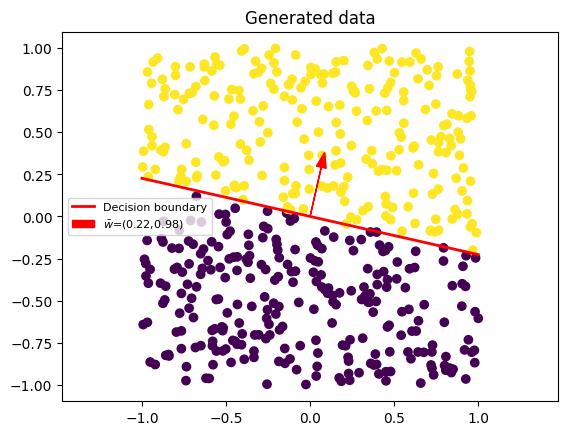

In [3]:
n = 500
n_features = 2

w_gt = uniform(-1,1,2)
w_gt /= norm(w_gt)

X = uniform(-1, 1, (n, n_features))
y = np.sign(X @ w_gt)

plot_data_and_boundaries(X, y, 'Generated data', [(w_gt, 'Decision boundary', 'red', r'$\bar{w}$')])

## 3) Testing the algorithm

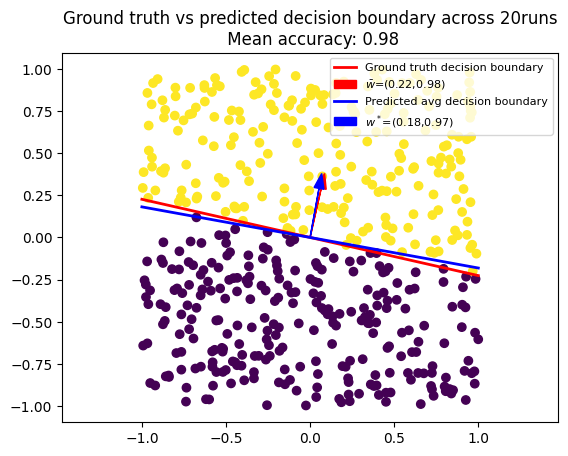

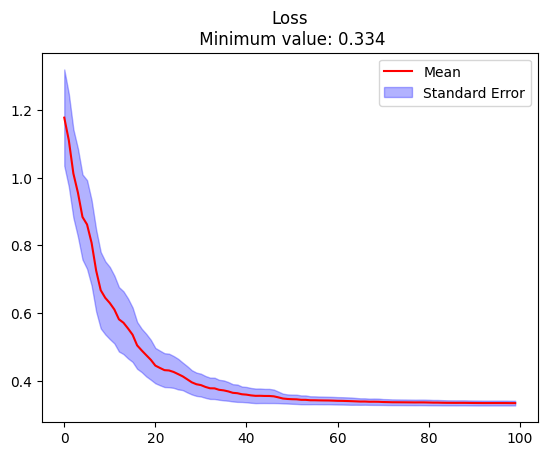

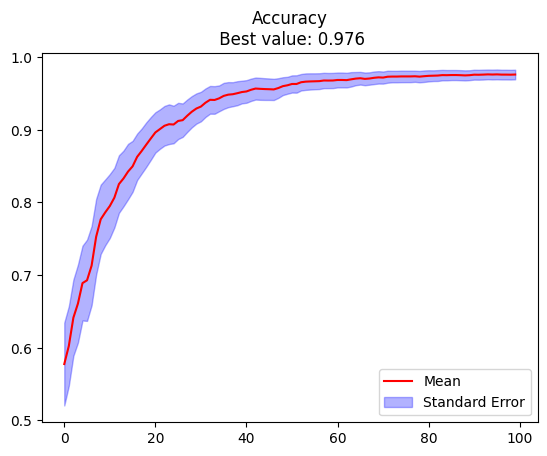

In [4]:
steps = 100 # Number of steps for the gradient descent
init_lr = 0.1 # initial learning rate

n_runs = 20

all_w = np.zeros((n_runs, 2))
all_losses = np.zeros((n_runs, steps))
all_accuracies = np.zeros((n_runs, steps))

for run in range(n_runs):
    w_pred, losses, accuracies = SGD(X, y, init_lr=init_lr,  max_iter=steps)
    all_w[run] = w_pred
    all_losses[run] = losses
    all_accuracies[run] = accuracies

plot_data_and_boundaries(
    X, 
    y, 
    f'Ground truth vs predicted decision boundary across {n_runs}runs\n Mean accuracy: {all_accuracies.mean(axis=0).max():.2f}', 
    [
        (w_gt, 'Ground truth decision boundary', 'red', r'$\bar{w}$'),
        (all_w.mean(axis=0), 'Predicted avg decision boundary', 'blue', r'$w^*$')
    ])

plot_with_margins(
    all_losses, 
    n_runs,
    f'Loss\n Minimum value: {all_losses.mean(axis=0).min():.3f}'
)

plot_with_margins(
    all_accuracies,
    n_runs,
    f'Accuracy\n Best value: {all_accuracies.mean(axis=0).max():.3f}'
)

## 4) Noising the observations

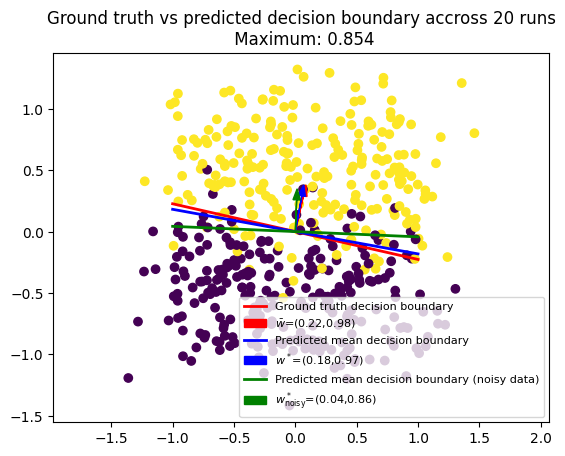

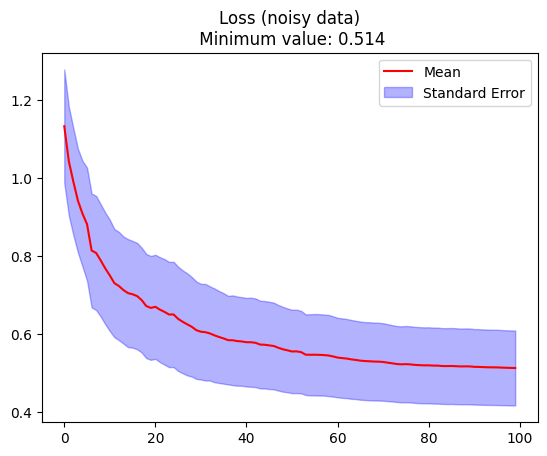

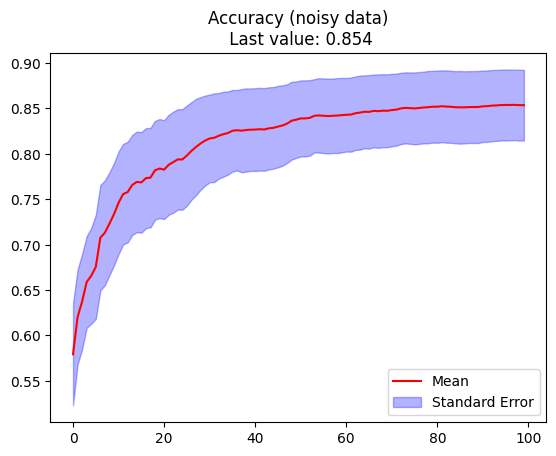

In [5]:
X_noisy = X + 0.2 * randn(n, n_features)

all_w_noisy = np.zeros((n_runs, 2))
all_accuracies_noisy = np.zeros((n_runs, steps))
all_losses_noisy = np.zeros((n_runs, steps))

for run in range(n_runs):
    w_pred_noisy, losses_noisy, accuracies_noisy = SGD(X_noisy, y, init_lr=0.1,  max_iter=steps)
    all_w_noisy[run] = w_pred_noisy
    all_accuracies_noisy[run] = accuracies_noisy
    all_losses_noisy[run] = losses_noisy

plot_data_and_boundaries(
    X_noisy, 
    y, 
    f'Ground truth vs predicted decision boundary accross {n_runs} runs\n Maximum: {all_accuracies_noisy.mean(axis=0).max():.3f}', 
    [
        (w_gt, 'Ground truth decision boundary', 'red', r'$\bar{w}$'),
        (all_w.mean(axis=0), 'Predicted mean decision boundary', 'blue', r'$w^*$'),
        (all_w_noisy.mean(axis=0), 'Predicted mean decision boundary (noisy data)', 'green', r'$w^*_\text{noisy}$')
    ])

plot_with_margins(
    all_losses_noisy, 
    n_runs,
    f'Loss (noisy data)\n Minimum value: {all_losses_noisy.mean(axis=0).min():.3f}'
)

plot_with_margins(
    all_accuracies_noisy, 
    n_runs,
    f'Accuracy (noisy data)\n Last value: {all_accuracies_noisy.mean(axis=0).max():.3f}'
)

The slope 

In [6]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X = breast_cancer_wisconsin_diagnostic.data.features.copy()
X = X.to_numpy()

y = breast_cancer_wisconsin_diagnostic.data.targets.copy() 
y['Diagnosis'] = y['Diagnosis'].map({"M": -1, "B": 1})
y = y.to_numpy().squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize the data to have 0 mean and unit variance
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the model 

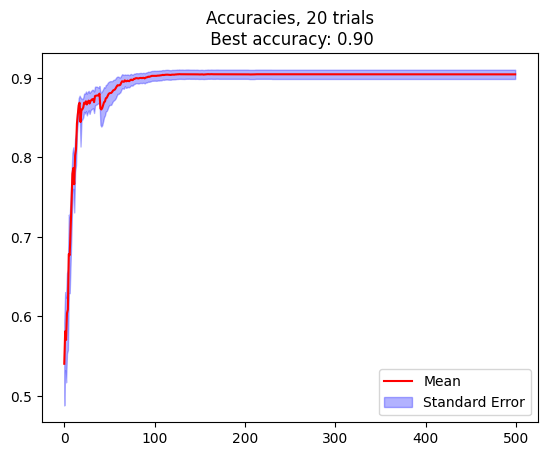

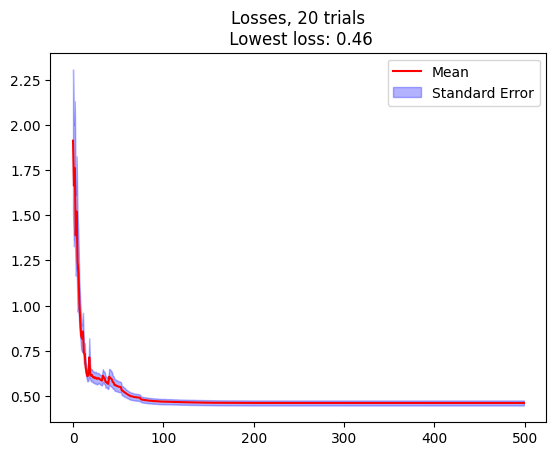

In [7]:
n_features = X.shape[1]
n_runs = 20
max_iter = 500
all_accuracies = np.zeros((n_runs, max_iter))
all_losses = np.zeros((n_runs, max_iter))
all_w = np.zeros((n_runs,n_features))



for run in range(n_runs):
    w_pred, losses, accuracies = SGD(X_train, y_train, max_iter=max_iter, init_lr=0.008)
    all_accuracies[run] = accuracies
    all_losses[run] = losses
    all_w[run] = w_pred

# plot(losses, f'Losses\n Min value: {min(losses):.3f}')
# plot(accuracies, f'Accuracies\n Last value: {accuracies[-1]:.3f}')


plot_with_margins(
    all_accuracies,
    n_runs,
    f'Accuracies, {n_runs} trials\n Best accuracy: {all_accuracies.mean(axis=0).max():.2f}'
)

plot_with_margins(
    all_losses,
    n_runs,
    f'Losses, {n_runs} trials\n Lowest loss: {all_losses.mean(axis=0).min():.2f}'
)

### Evaluating the model

In [8]:
test_accuracies = np.zeros(n_runs)

for i, w_pred in enumerate(all_w):
    y_test_pred = predict(X_test, w_pred)
    test_acc = accuracy(y_test_pred, y_test)
    test_accuracies[i] = test_acc

stderr_acc = test_accuracies.std(axis=0) / np.sqrt(n_runs) 
mean_acc = test_accuracies.mean(axis=0)

print(rf'Test accuracy: {mean_acc:.2f} +/- {stderr_acc:.2f}')

Test accuracy: 0.89 +/- 0.01
